<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [4]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.7)]
Train_Y = Data_Y[:int(len(Data_Y)*0.7)]
#Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
#Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(Data_X.shape)
print(Train_X.shape)
#print(Vald_X.shape)
print(Test_X.shape)

print(Data_Y.shape)
print(Train_Y.shape)
#print(Vald_Y.shape)
print(Test_Y.shape)

print(Data_X.shape)
print(Data_Y.shape)
print(Data_X[:10])
print(Data_Y[:10].astype('int'))

(22950, 5, 5000, 1)
(16064, 5, 5000, 1)
(6886, 5, 5000, 1)
(22950, 9)
(16064, 9)
(6886, 9)
(22950, 5, 5000, 1)
(22950, 9)
[[[[ 0.13094077]
   [ 0.13426788]
   [ 0.13725989]
   ...
   [ 0.29248513]
   [ 0.29248513]
   [ 0.29248513]]

  [[ 0.1185824 ]
   [ 0.12181842]
   [ 0.12472851]
   ...
   [ 0.2930481 ]
   [ 0.2930481 ]
   [ 0.2930481 ]]

  [[ 0.06765384]
   [ 0.06765384]
   [ 0.06765384]
   ...
   [ 0.0653845 ]
   [ 0.0653845 ]
   [ 0.0653845 ]]

  [[ 0.10997413]
   [ 0.10997413]
   [ 0.10997413]
   ...
   [ 0.05445085]
   [ 0.05445085]
   [ 0.05445085]]

  [[ 0.31572279]
   [ 0.30807951]
   [ 0.29945085]
   ...
   [ 0.20175829]
   [ 0.20368338]
   [ 0.20553999]]]


 [[[ 0.09996753]
   [ 0.09996753]
   [ 0.09996753]
   ...
   [ 0.1853474 ]
   [ 0.1897277 ]
   [ 0.19018248]]

  [[ 0.09835145]
   [ 0.09877051]
   [ 0.10244886]
   ...
   [ 0.22707055]
   [ 0.22707055]
   [ 0.22707055]]

  [[ 0.12270904]
   [ 0.12426921]
   [ 0.12554571]
   ...
   [ 0.13322839]
   [ 0.13594687]
   [ 0.

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 5, 5000, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 4, 2498, 50)  550         data[0][0]                       
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 3, 1249, 50)  10050       conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 3, 1249, 50)  200         conv2d_1[0][0]                   
______________________________________________________________________________________________

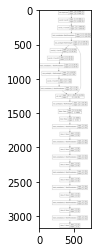

In [5]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 50, kernel_size = (2, 5),strides=(1, 2), activation = "relu") (inputs)
x = layers.Conv2D(filters = 50, kernel_size = (2, 2),strides=(1, 2), activation = "relu") (x)
x = layers.BatchNormalization()(x)
block_1_output = layers.MaxPooling2D(pool_size = (1,10)) (x)

x = layers.Conv2D(filters = 50, kernel_size = (2,5),strides = (1, 2),padding = 'valid', activation='relu') (block_1_output)
x = layers.Conv2D(filters = 50, kernel_size = (1,5),strides = (1, 2),padding = 'valid', activation='relu') (x)
x = layers.BatchNormalization()(x)
block_2_output = layers.MaxPooling2D(pool_size = (1,8)) (x)

x = layers.Conv2D(filters = 50,kernel_size= (2, 3),strides = (1, 2), activation="relu")(block_2_output)
x = layers.BatchNormalization()(x)
block_3_output = layers.add([x, block_1_output])
x = layers.MaxPooling2D(pool_size = (1,1))(block_3_output)

#x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 2), activation="relu")(x)

#x = layers.AveragePooling2D(pool_size = (1,4))(x)
#x = layers.Conv2D(filters = 25,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
#x = layers.AveragePooling2D(pool_size = (1,4))(x)

'''
x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (inputs)
block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])
 
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])
 
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
 
block_6_output = layers.add([x, block_3_output])
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
block_7_output = layers.add([x, block_6_output])
 
x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 
 '''
x = layers.Flatten()(x) 
 
 
x = layers.Dense(64, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(58, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(46, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(40, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.BatchNormalization()(x)
#x = layers.Dense(28, activation="relu")(x)
#x = layers.Dense(22, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.BatchNormalization()(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [11]:
history = model.fit(Train_X, Train_Y, epochs=1000,batch_size = 200, verbose=2)#, validation_data=(Vald_X,Vald_Y))

Epoch 1/1000
81/81 - 4s - loss: 0.0370 - accuracy: 0.9769
Epoch 2/1000
81/81 - 4s - loss: 0.0371 - accuracy: 0.9761
Epoch 3/1000
81/81 - 4s - loss: 0.0355 - accuracy: 0.9779
Epoch 4/1000
81/81 - 4s - loss: 0.0353 - accuracy: 0.9794
Epoch 5/1000
81/81 - 4s - loss: 0.0326 - accuracy: 0.9807
Epoch 6/1000
81/81 - 4s - loss: 0.0351 - accuracy: 0.9783
Epoch 7/1000
81/81 - 4s - loss: 0.0334 - accuracy: 0.9814
Epoch 8/1000
81/81 - 4s - loss: 0.0357 - accuracy: 0.9805
Epoch 9/1000
81/81 - 4s - loss: 0.0305 - accuracy: 0.9840
Epoch 10/1000
81/81 - 4s - loss: 0.0422 - accuracy: 0.9755
Epoch 11/1000
81/81 - 4s - loss: 0.0434 - accuracy: 0.9734
Epoch 12/1000
81/81 - 4s - loss: 0.0402 - accuracy: 0.9728
Epoch 13/1000
81/81 - 4s - loss: 0.0364 - accuracy: 0.9755
Epoch 14/1000
81/81 - 4s - loss: 0.0372 - accuracy: 0.9745
Epoch 15/1000
81/81 - 4s - loss: 0.0365 - accuracy: 0.9764
Epoch 16/1000
81/81 - 4s - loss: 0.0361 - accuracy: 0.9774
Epoch 17/1000
81/81 - 4s - loss: 0.0358 - accuracy: 0.9778
Epoch 

In [12]:
#Test_X,Test_Y = prepare_test_data()

#Test_Y_1 = to_categorical(Test_Y)
Train_Y_1 = to_categorical(Train_Y)
print(Test_X.shape)
print(Test_Y.shape)
print(to_categorical(Test_Y).shape)
print(Train_X.shape)
print(Train_Y.shape)
print(to_categorical(Train_Y).shape)

(6886, 5, 5000, 1)
(6886, 9)
(6886, 9, 2)
(16064, 5, 5000, 1)
(16064, 9)
(16064, 9, 2)


In [15]:
from numpy import argmax
from numpy import random
print ('Training   ', model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Validation ', model.metrics_names,' = ',model.evaluate(Vald_X,  Vald_Y, verbose=0))
print ('Testing    ', model.metrics_names,' = ',model.evaluate(Test_X,  Test_Y, verbose=0))

print ('true (Test)     \n',argmax(Test_Y,axis=1))
print ('predicted (Test)\n',argmax(model.predict(Test_X), axis=1))

print ('true (Train)     \n',argmax(Train_Y[:10],axis=1))    
print ('predicted (Train)\n', argmax(model.predict(Train_X[:10]), axis=1))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
#print (model.summary())
 
 
numpy.savetxt('/content/drive/My Drive/Colab_Data/Fault_Detect/Test_Data_Predict.csv',argmax(model.predict(Test_X), axis=1),delimiter=',')
numpy.savetxt('/content/drive/My Drive/Colab_Data/Fault_Detect/Test_Data_True.csv',argmax(Test_Y,axis=1),delimiter=',')

Training    ['loss', 'accuracy']  =  [0.0825333371758461, 0.9774028658866882]
Testing     ['loss', 'accuracy']  =  [0.1180606335401535, 0.972553014755249]
true (Test)     
 [2 5 5 ... 6 0 8]
predicted (Test)
 [2 5 5 ... 6 0 8]
true (Train)     
 [7 7 4 8 1 6 1 4 2 3]
predicted (Train)
 [7 7 4 8 1 6 3 4 2 3]


dict_keys(['loss', 'accuracy'])


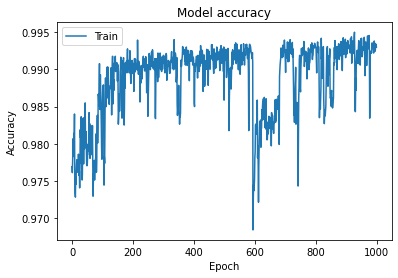

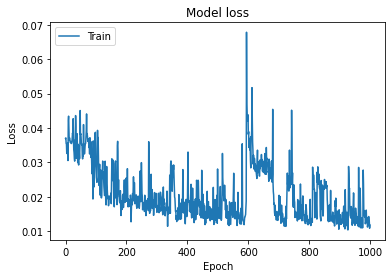

In [14]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:

model.save('/content/drive/My Drive/Colab_Data/Fault_Detect/my_model.h5')
